<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Time_series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Important Lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
# Setting t5he index and converting it tnto datetime format
df.set_index('Datetime', inplace = True)
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


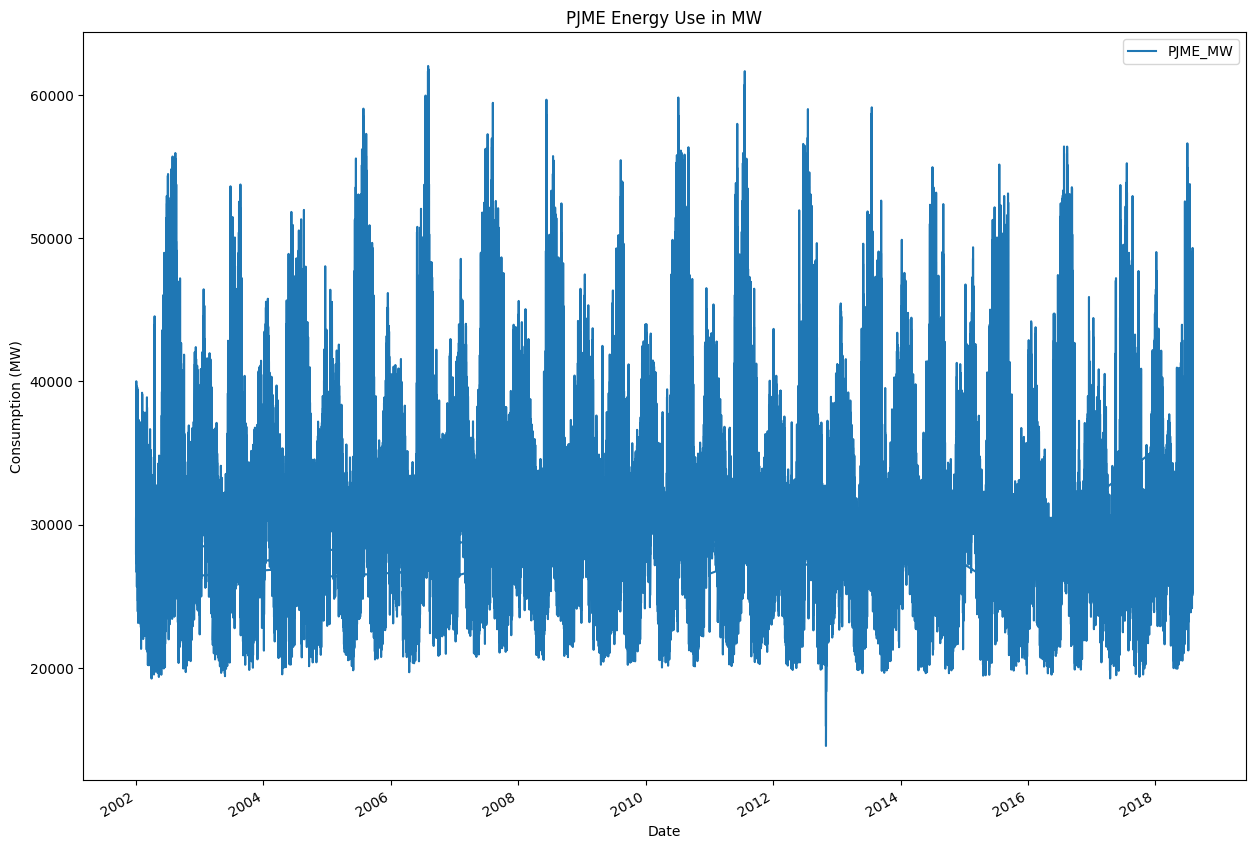

In [ ]:
# plot
df.plot(figsize= (15, 11), title= 'PJME Energy Use in MW')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

In [ ]:
# Extracting some features
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x : x.week)
df = df.set_index('Datetime')
df['day'] = [x for x in df.index.day]
df['hour'] = [x for x in df.index.hour]
df['day_str'] = [x.strftime('%a') for x in df.index] # %a gives name of day in 3 letters like Tue
# df['day_str'] = [x.strftime('%A') for x in df.index]  will give name of day in full like Tuesday
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df['day_of_week'] = [x.dayofweek for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


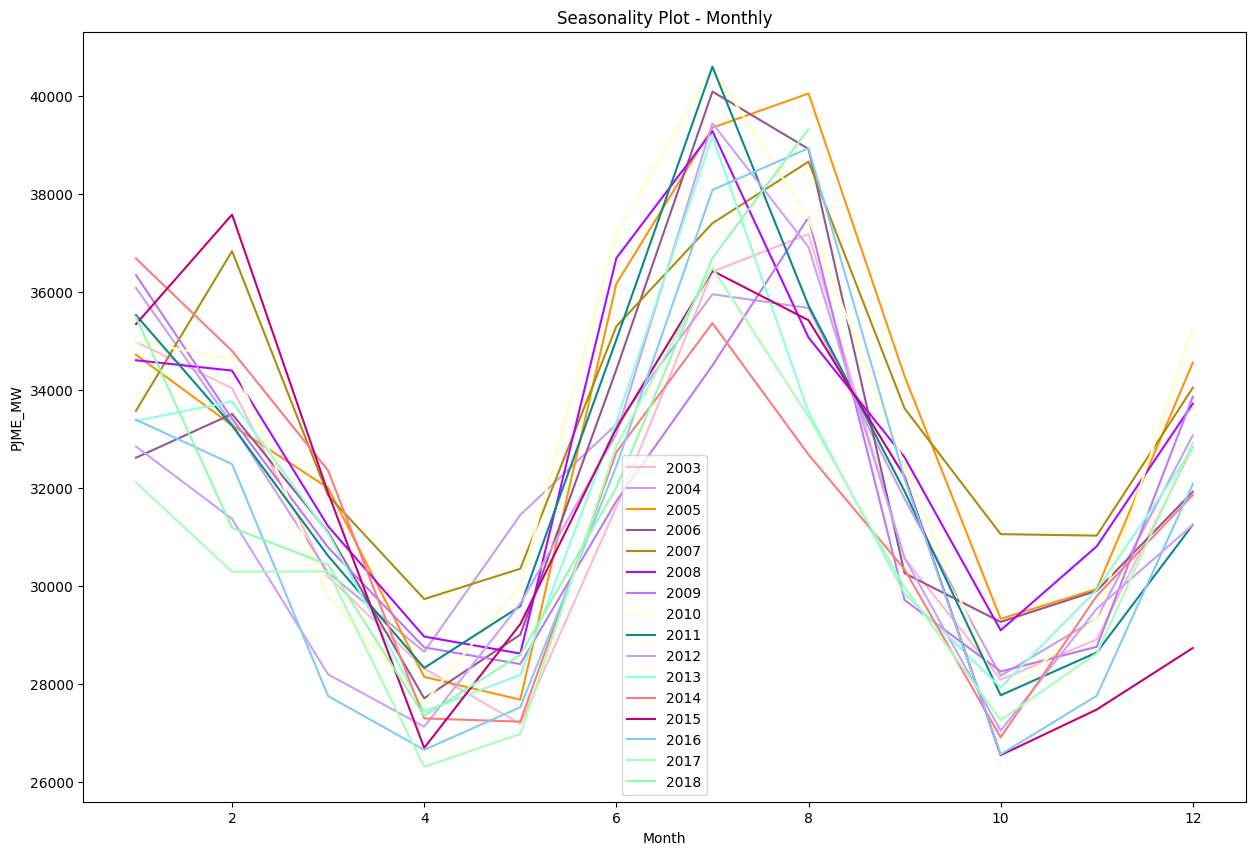

In [ ]:
# Monthly Seasonal plot
import matplotlib
np.random.seed(5)

df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(years), replace= False)

# PLot
plt.figure(figsize= (15,10))
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'PJME_MW', data  = df_plot[df_plot['year'] == y], color = colors[i], label = y)

# Setting the label
plt.title('Seasonality Plot - Monthly')
plt.xlabel('Month')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

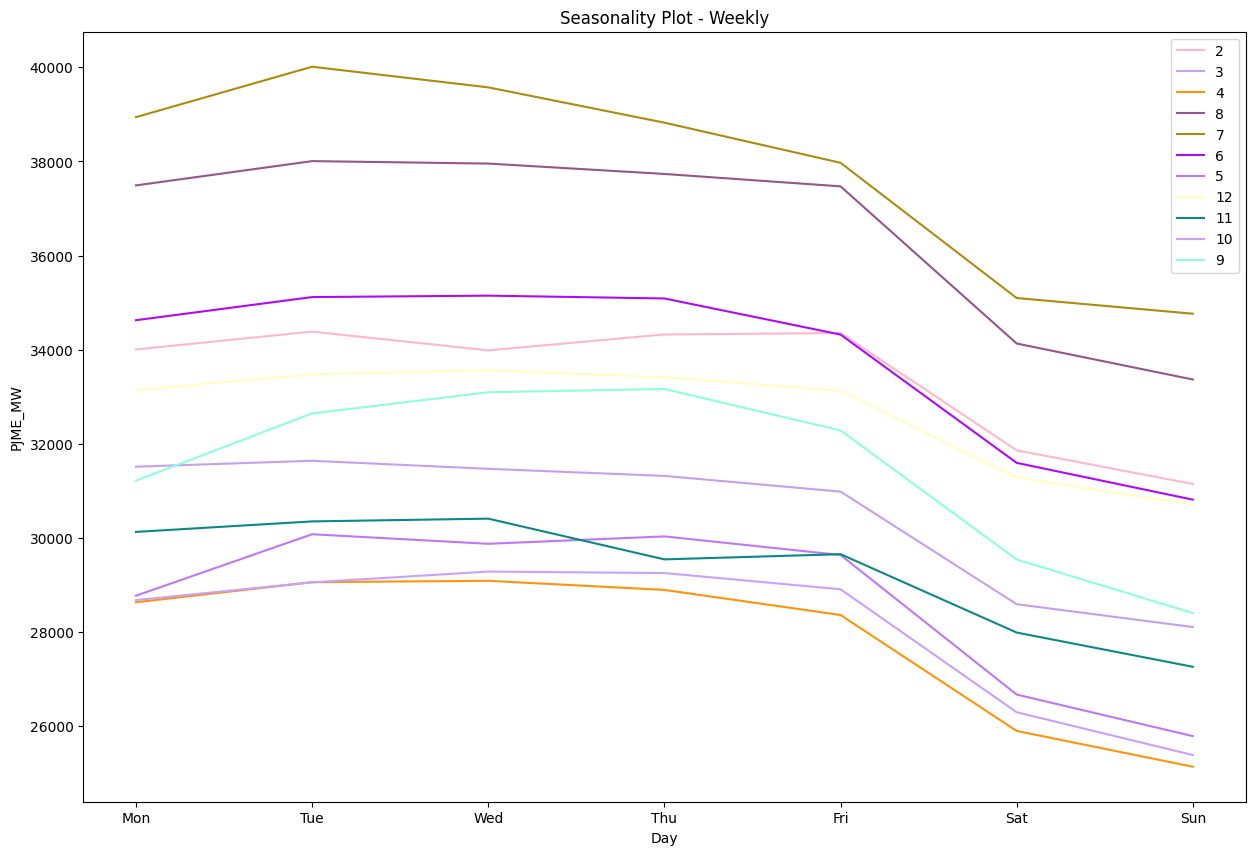

In [ ]:
# Weekly Seasonal plot of year 2018
import matplotlib
np.random.seed(5)

df_plot = df[['day_str', 'month','PJME_MW', 'day_of_week']].dropna().groupby(['day_str','month', 'day_of_week']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'day_of_week', ascending= True)
df_plot = df_plot.drop('day_of_week', axis = 1)
months = df_plot['month'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(months), replace= False)

# PLot
plt.figure(figsize= (15,10))
for i, y in enumerate(months):
  if i > 0:
    plt.plot('day_str','PJME_MW', data  = df_plot[df_plot['month'] == y], color = colors[i], label = y)

# Setting the label
plt.title('Seasonality Plot - Weekly')
plt.xlabel('Day')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

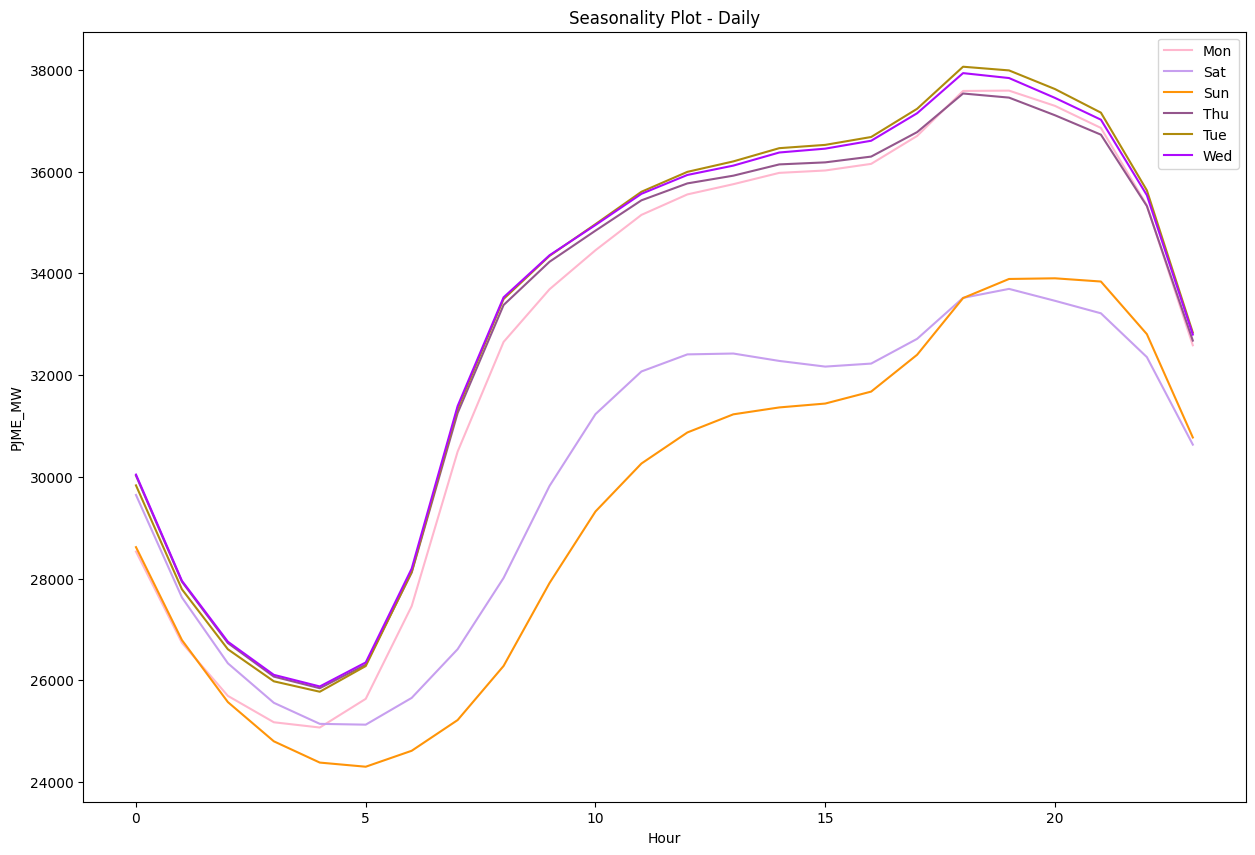

In [ ]:
# Daily Seasonal plot of year 2018
import matplotlib
np.random.seed(5)

df_plot = df[['hour','day_str','PJME_MW']].dropna().groupby(['hour','day_str']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'hour', ascending= True)
#df_plot = df_plot.drop('day_of_week', axis = 1)
hours = df_plot['day_str'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(hours), replace= False)

# PLot
plt.figure(figsize= (15,10))
for i, y in enumerate(hours):
  if i > 0:
    plt.plot('hour','PJME_MW', data  = df_plot[df_plot['day_str'] == y], color = colors[i], label = y)

# Setting the label
plt.title('Seasonality Plot - Daily')
plt.xlabel('Hour')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

In [ ]:
'''
Conclusions ->
(1) Yearly consumption plot do not change a lot over years
(2) Weekly Consumption plot shows that there is heavy usage on weekdays
(3) Hourly consumption plot shows that from 05:00 till 20:00,
there is heavy usage aftert that it decreaes.
'''

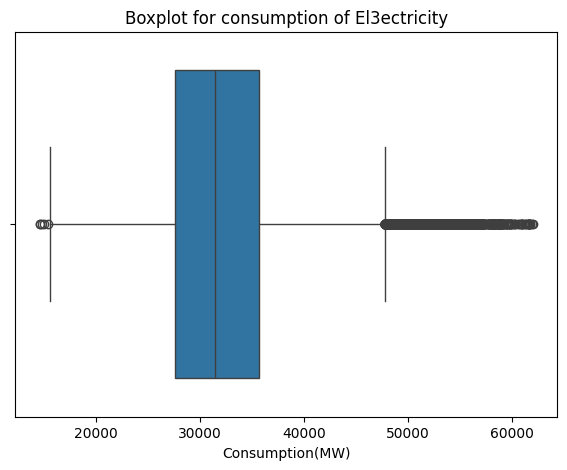

In [ ]:
# Boxplot for outliers

plt.figure(figsize= (7,5))
sns.boxplot(x = 'PJME_MW', data = df)
plt.xlabel('Consumption(MW)')
plt.title(f'Boxplot for consumption of El3ectricity')
plt.show()


In [ ]:
'''
As we can see there are outliers in both left anf right tail but
there are a lot of outliers in right tail as compared to left tail
'''

In [ ]:
# Creating feature
# df['year'] = [x for x in df.index.year]
# df['month'] = [x for x in df.index.month]
# df['year_month'] = [str]

In [ ]:
# Filtering the data
df_plot = df[df['year'] >= 2016].reset_index().sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2016-01-01 00:00:00,26686.0,2016,1,53,1,0,Fri,2016_1,4
2016-01-01 01:00:00,25509.0,2016,1,53,1,1,Fri,2016_1,4
2016-01-01 02:00:00,24599.0,2016,1,53,1,2,Fri,2016_1,4
2016-01-01 03:00:00,23896.0,2016,1,53,1,3,Fri,2016_1,4
2016-01-01 04:00:00,23567.0,2016,1,53,1,4,Fri,2016_1,4


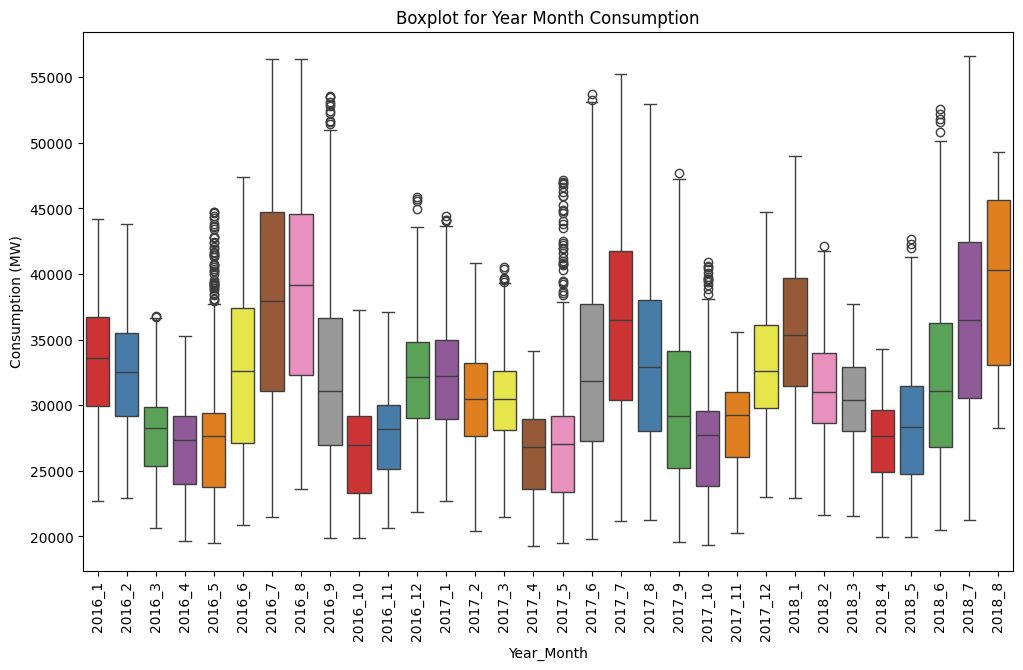

In [ ]:
# Boxplot
plt.figure(figsize= (12, 7))
sns.boxplot(x = 'year_month', y = 'PJME_MW', data = df_plot, palette= 'Set1')
plt.xlabel('Year_Month')
plt.ylabel('Consumption (MW)')
plt.title('Boxplot for Year Month Consumption')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
'''
It seems that there is a 'W' seasonal pattern in the data
'''

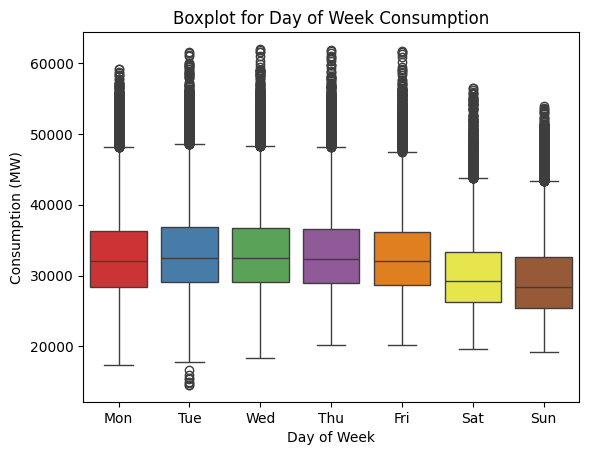

In [ ]:
# Boxplot
df_plot = df[['day_str','day_of_week', 'PJME_MW' ]].sort_values(by = 'day_of_week')
sns.boxplot(x = 'day_str', y = 'PJME_MW', data = df_plot, palette= 'Set1')
plt.title('Boxplot for Day of Week Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Consumption (MW)')
plt.show()

In [ ]:
'''
(1) on nall 7 days , there are outliers in right tail
(2) We get outliers in left tail only on tuesday
(3) Consumptions are lower on Weekends
'''

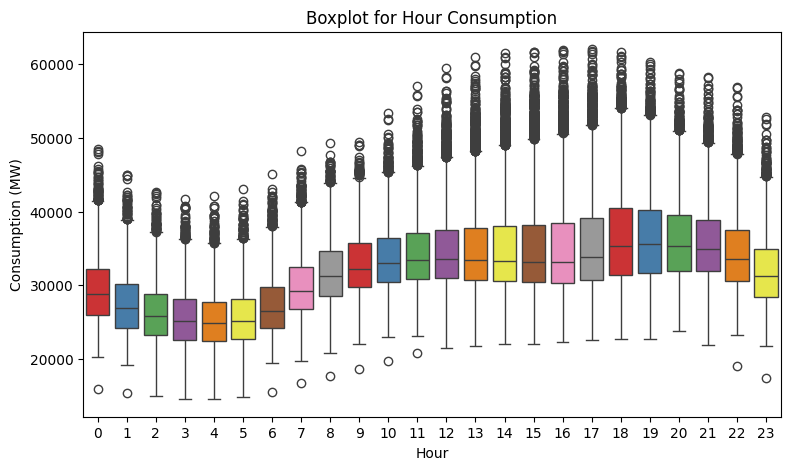

In [ ]:
# Boxplot
df_plot = df[['hour', 'PJME_MW' ]].sort_values(by = 'hour')
plt.figure(figsize = (9,5))
sns.boxplot(x = 'hour', y = 'PJME_MW', data = df_plot, palette= 'Set1')
plt.title('Boxplot for Hour Consumption')
plt.xlabel('Hour')
plt.ylabel('Consumption (MW)')
plt.show()

In [ ]:
'''
Conclusion - >

'''

In [ ]:
'''
Time series series -> trend component + seasonal component + noise component

sometimes, there can be more than 1 seasonal component as well.

there are two main type of decomposition : additive and multiplicative

Additive -> S + T + R

Multiplicative -> S * T * R

Additive decomposition is best suited foe scenarios with constance variance
Multiplicative decomposition is best suoited for scenarios with non-stationary variance


'''

In [ ]:
#Filterong the data
df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot.drop_duplicates(subset= ['Datetime']).sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


In [ ]:
# Adding new columns
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6,28171.0,28171.0
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6,26879.0,26879.0
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6,25848.0,25848.0
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6,25039.0,25039.0
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6,24637.0,24637.0


In [ ]:
# Importing 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decompostion
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period= 24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model= 'multiplicative', period= 24*7)


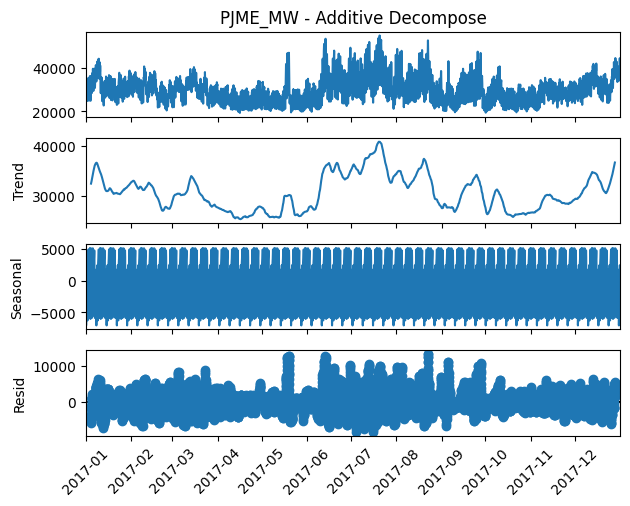

In [ ]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

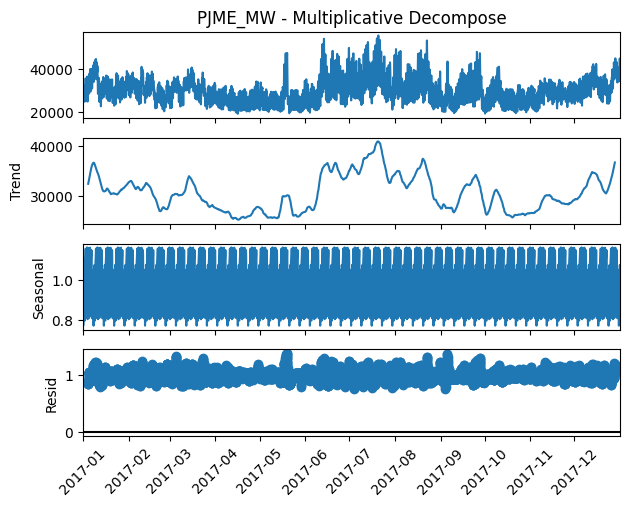

In [ ]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Filteroing the data
df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot[df_plot['month'] == 5]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot = df_plot.drop_duplicates(subset= ['Datetime']).sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-05-01 00:00:00,23949.0,2017,5,18,1,0,Mon,2017_5,0,23949.0,23949.0
2017-05-01 01:00:00,22337.0,2017,5,18,1,1,Mon,2017_5,0,22337.0,22337.0
2017-05-01 02:00:00,21369.0,2017,5,18,1,2,Mon,2017_5,0,21369.0,21369.0
2017-05-01 03:00:00,20850.0,2017,5,18,1,3,Mon,2017_5,0,20850.0,20850.0
2017-05-01 04:00:00,20812.0,2017,5,18,1,4,Mon,2017_5,0,20812.0,20812.0


In [ ]:
# Additive Decompostion
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period= 24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model= 'multiplicative', period= 24*7)

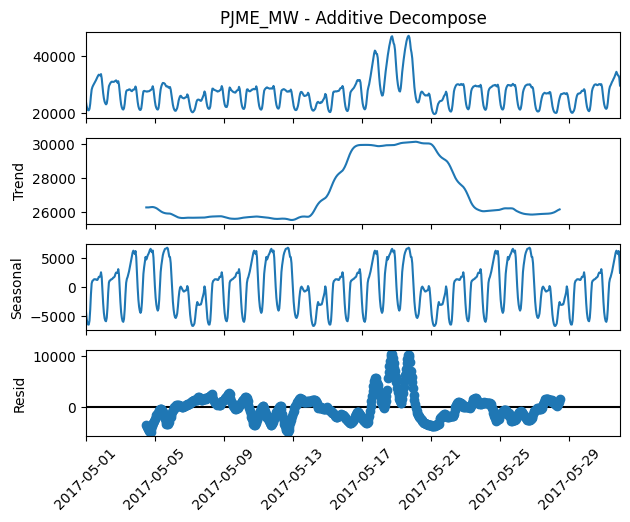

In [ ]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

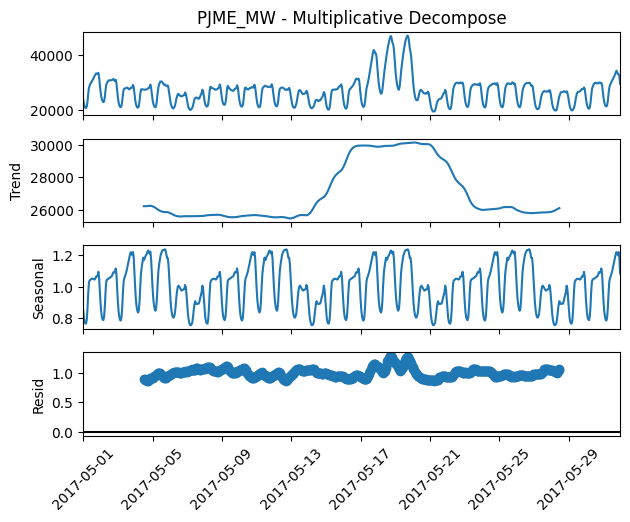

In [ ]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

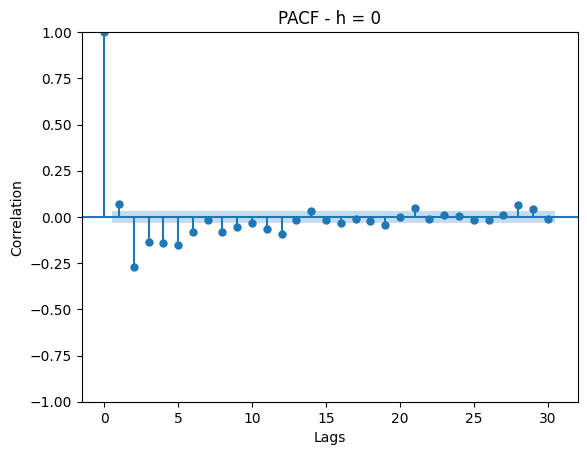

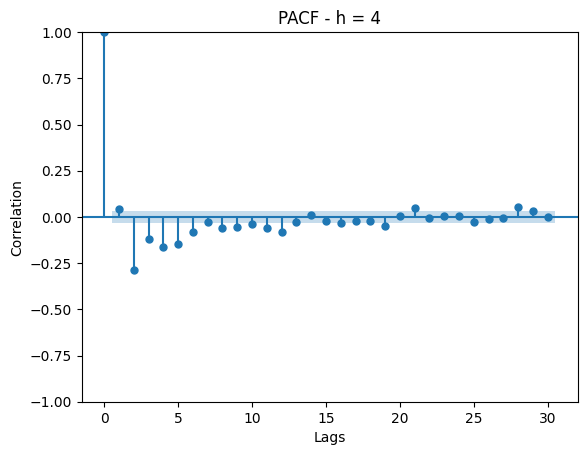

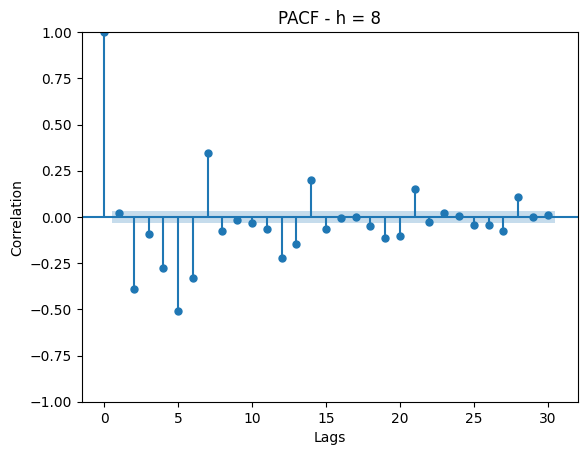

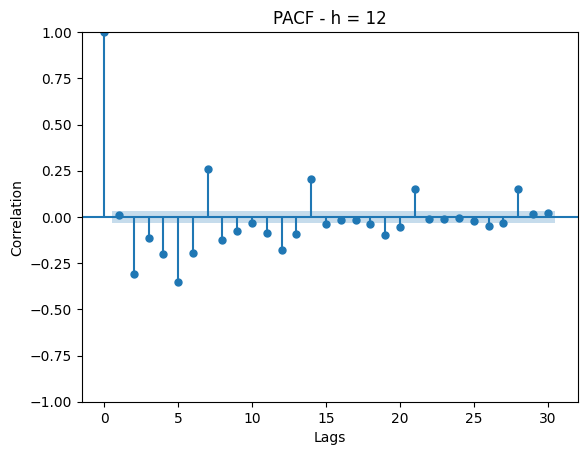

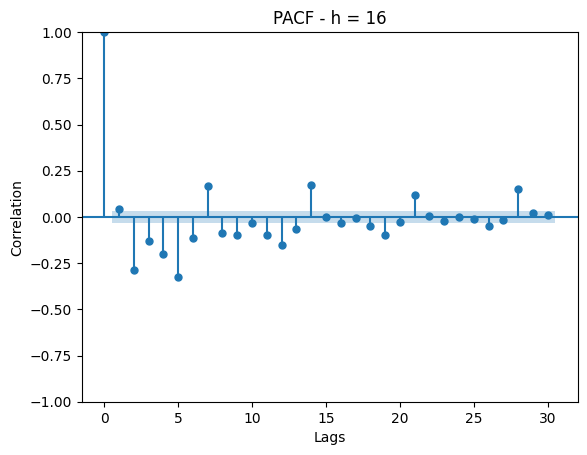

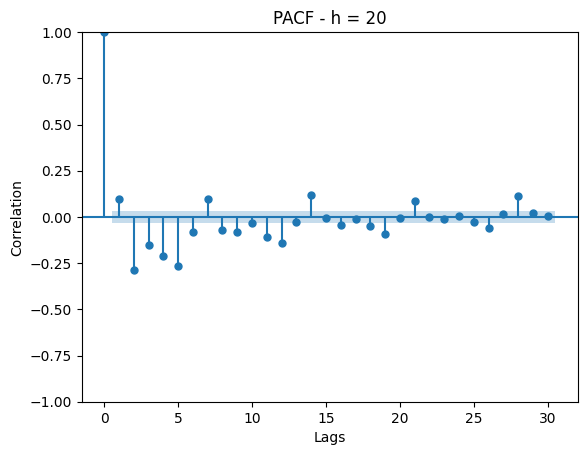

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours = range(0, 24, 4)
for hour in hours:
  plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags = 30, alpha= 0.01)
  plt.title(f'PACF - h = {hour}')
  plt.ylabel('Correlation')
  plt.xlabel('Lags')
  plt.show()


In [ ]:
'''
Blue shaded reagion is 95% confidence interval and if the lag is out the reagion then it is Significant
'''